# Introduction

- Logistic Regression is a supervised machine learning algorithm that uses regression to predict the continuous probability, ranging from 0 to 1, of a data sample belonging to a specific category, or class. 
- Then, based on that probability, the sample is classified as belonging to the more probable class, ultimately making Logistic Regression a classification algorithm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Suppose we have 20 students and they formed the following dataset
d = {'hours_studied': list(range(20)), 'exam_results': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data=d)
df.head()
# hours_studied represents the number of hours they studied for an exam
# exam_results represents their failure (0) or success (1) on the exam

,hours_studied,exam_results
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


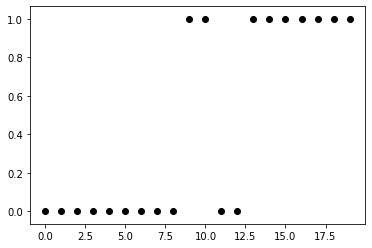

In [3]:
# Lets make a scatter plot of the data
plt.scatter(df.hours_studied, df.exam_results, color='black')
plt.show()

In [4]:
# From a visual inspection, it looks like students who studied 10 or more hours
# Were more likely to pass the exam

# Linear Regression Approach

Recall that in Linear Regression, we fit a regression line of the following form to the data:

    y = b0 + b1x1 + b2x2 + ... + bnxn

- Where y is the value we are trying to predict
- b0 is the intercept of the regression line
- b1, b2, ... bn are the coefficients of the features x1, x2, ... xn of the regression line

For our data points y is either 1 (success) or 0 (failing) and we have one feature (hours_studied). If we fit a Linear Regression model to our data and plotted the results...

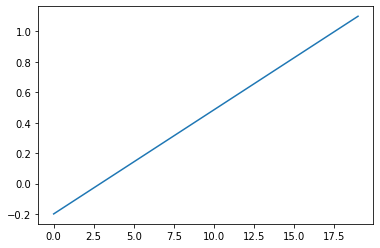

In [5]:
regr = LinearRegression()
regr.fit(df.hours_studied.values.reshape(-1,1), df.exam_results.values.reshape(-1,1))
y_predict = regr.predict(df.hours_studied.values.reshape(-1,1))
plt.plot(df.hours_studied.values, y_predict)
plt.show()

We can see that at 0 hours studied, we have a negative probability predicted, and at higher numbers of hours studied we have probabilities greater than 1.0 predicted.

These probabilities greater than 1.0 and less than 0.0 are meaningless!

We get these meaningless probabilities because the output of a Linear Regression model ranges from negative infinity to infinity.

# Logistic Regression Defined

To predict the probability of a data sample belonging to a class, we:

1. Initialize all feature coefficients and intercept to 0
2. Multiply each of the feature coefficients by their respective feature value to get what is known as the log-odds
3. place the log-odds into the sigmoid function to link the output to the range `[0,1]`, giving us a probability

By comparing the predicted probabilities to the actual classes of our data points, we can evaluate how well our model makes predictions and use gradient descent to update the coefficients and find the best ones for our model.

To then make a final classification, we use a classification threshold to determine whether the data sample belongs to the positive class or the negative class.

# Log-Odds

The log-odds are another way of expressing the probability of a sample belonging to the positive class, or a student passing the exam. 

In probability, we calculate the odds of an event occurring as follows:

Odds = P(event occurring) / P(event not occurring)

The odds tell us how many more times likely an event is to occur than not occur. If a student will pass the exam with probability 0.7, they will fail with probability 1 - 0.7 = 0.3.

We can then calculate the odds of passing as: 

    Odds of passing = 0.7/0.3 = 2.33
    At this P(pass), a student is 2.33 times more likely to pass than to fail. 
    
The log-odds are then understood as the logarithm of the odds:

    Log odds of passing = log(2.33) = 0.847
    
For our Logistic Regression model, however, we calculate the log-odds, represented by z below, by summing the product of each feature value by its respective coefficient and adding the intercept. This allows us to map our feature values to a measure of how likely it is that a data sample belongs to the positive class.

    z = b0 + b1x1 + ... + bnxn

- b0 is the intercept
- b1, b2, ... bn are the coefficients of the features x1, x2, ... xn

In our previous example, we only had one feature value (x1), so we would only have one coefficient. But if we also had captured an additional feature (like number of cups of coffee), we would have a coefficient for that feature. These coefficients would likely be very different, as the relative impact of studying vs. drinking coffee would be quite different. 

This kind of multiplication and summing is known as a dot product.

We can perform a dot product using numpy‘s np.dot() method! Given feature matrix features, coefficient vector coefficients, and an intercept, we can calculate the log-odds in numpy as follows:

    log_odds = np.dot(features, coefficients) + intercept
    
np.dot() will take each row, or student, in features and multiply each individual feature value by its respective coefficient in coefficients

In [6]:
# Let’s create a function log_odds that takes features, coefficients and intercept as parameters.
def log_odds(features, coefficients, intercept):
    return np.dot(features, coefficients) + intercept

In [7]:
calculated_coefficients = [[0.20678491]]
intercept = [-1.76125712]

In [8]:
calculated_log_odds = log_odds(df.hours_studied.values.reshape(-1,1), calculated_coefficients, intercept)
print(calculated_log_odds)

[[-1.76125712]
 [-1.55447221]
 [-1.3476873 ]
 [-1.14090239]
 [-0.93411748]
 [-0.72733257]
 [-0.52054766]
 [-0.31376275]
 [-0.10697784]
 [ 0.09980707]
 [ 0.30659198]
 [ 0.51337689]
 [ 0.7201618 ]
 [ 0.92694671]
 [ 1.13373162]
 [ 1.34051653]
 [ 1.54730144]
 [ 1.75408635]
 [ 1.96087126]
 [ 2.16765617]]


# Sigmoid Function

The Sigmoid Function is a special case of the more general Logistic Function, where Logistic Regression gets its name. 

Why is the Sigmoid Function so important? 

By plugging the log-odds into the Sigmoid Function, defined below, we map the log-odds `z` to the range `[0,1]`

    h(z) = 1 / (1 + e ** -z)
    
- `e ** -z` is the exponential function, which van be written in `numpy` as `np.exp(-z)`

This enables our Logistic Regression model to output the probability of a sample belonging to the positive class, or in our case, a student passing the final exam.

In [9]:
# Lets create a sigmoid function of our own
def sigmoid(z):
    denominator = 1 + np.exp(-z)
    return 1/denominator

In [10]:
# Calculate the sigmoid of the log-odds
probabilities = sigmoid(calculated_log_odds)
print(probabilities)

[[0.14663296]
 [0.17444128]
 [0.20624873]
 [0.24215472]
 [0.28209011]
 [0.32578035]
 [0.37272418]
 [0.42219656]
 [0.47328102]
 [0.52493108]
 [0.57605318]
 [0.62559776]
 [0.67264265]
 [0.71645543]
 [0.7565269 ]
 [0.79257487]
 [0.82452363]
 [0.85246747]
 [0.87662721]
 [0.89730719]]


# Log Loss

Now that we understand how a Logistic Regression model makes its probability predictions, what coefficients and intercept should we use in our model to best predict whether a student will pass the exam?

In the example above, we were supplied the coefficients and intercept. How can we calculate them?

The function used to evaluate the performance of a machine learning model is called a loss function, or a cost function. To evaluate how “good a fit” a model is, we calculate the loss for each data sample (how wrong the model’s prediction was) and then average the loss across all samples.

The loss function for Logistic Regression, known as Log Loss, is given below:

    -1/m * sum(i=1 to m)[(y_i)log(h(z_i))+(1 - y_i)log(1 - h(z_i))]
    
- `m` is the total number of data samples
- `y_i` is the class of data sample `i`
- `z_i` is the log-odds of sample `i`
- `h(z_i)` is the sigmoid of the log-odds of sample `i` which is the probability of sample `i` belonging to the positive class

The goal of the Logistic Regression model is to the find the feature coefficients and intercept, which shape the logistic function, that minimize log-loss for our training data. 

#### Breaking Down Log-Loss Function
Lets break down our log-loss function into two separate parts. 

#### Consider the case when a data sample has class `y = 1` (success, in the case of our data). 

The right side of the equation (after the +) drops out, because we would end up with (1 - y_i) turning into (1 - 1) = 0. That 0 then is multiplied by some value, but still ends up being 0. 

In this case (success), the loss for that individual student becomes:
    
    loss(where y=1) = -log(h(z_i))
    
In other words, the loss is just the log of the probability the student passed the exam. 

#### And for a student who failed the exam, the sample has class `y = 0`

The left side of the equation would drop out (become equal to 0), and the loss for that individual student becomes:

    loss(where y=0) = -log(1-h(z_i))
    
In other words, the loss is the log of one minus the probability of success. What is one minus the probability of success? The probability of failure!

So lets reason through this. 
- In the case of a student who actually passed the exam, as our model's predicted probability for this student approaches 1 (100% chance of passing), the amount of loss calculated at this point approaches 0. Confident correct predictions result in small losses.
- In the case of a student who actually failed the exam, as our model's predicted probability for this student approachs 1 (100% chance of passing), the amount of loss calculated at this point approaches infinity. Confident incorrect predictions result in large losses.

Therefore, coefficients and intercepts that have higher probabilities for passing students and lower probabilities for failing students will have the overall least log loss.

We can use gradient descent to find the coefficients that minimize log-loss across all of our training data. 

In [11]:
# Function to calculate log-loss
def log_loss(probabilities,actual_class):
    return np.sum(-(1/actual_class.shape[0])*(actual_class*np.log(probabilities) + (1-actual_class)*np.log(1-probabilities)))

In [12]:
# Lets call this function using the probabilities we previously calculated (we got these by condensing the log odds into a sigmoid function)
passed_exam = df.exam_results.values.reshape(-1,1) # For clarity, we will store the exam_results column of our DataFrame in a simple array called passed_exam
loss = log_loss(probabilities, passed_exam) # We pass the probabilities (calculated using our provided coefficient and intercept) and the true classes (success or failure) for each observation
print(loss)

0.398640332141742


In [13]:
# This loss is pretty good! (That's because the coefficient and intercept were already excellent choices)
# What if we had used a coefficient and intercept of 0,0?
num_hours = df.hours_studied.values.reshape(-1,1) # For clarity, we will store the hours_studied column of our DataFrame in a simple array called num_hours
num_hours

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [14]:
lousy_calculated_log_odds = log_odds(num_hours, coefficients = 0, intercept = 0)
lousy_calculated_log_odds

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [15]:
# Calculate the sigmoid of the log-odds
lousy_probabilities = sigmoid(lousy_calculated_log_odds)
print(lousy_probabilities)

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [16]:
# Lets plug in our results into our log_loss function
lousy_loss = log_loss(lousy_probabilities, passed_exam)
print(lousy_loss)

0.6931471805599453


If we start with a coefficient of 0 and intercept of 0, then we end up with a larger loss value. 

We can start any determination of optimal coefficients and intercepts with 0,0 and use gradient descent to find the lowest loss in a stepwise manner. 

# Classification Thresholding

The default threshold for many algorithms is 0.5. 

If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the classification of the sample is the positive class. 

If the predicted probability of an observation belonging to the positive class is less than the threshold, 0.5, the classification of the sample is the negative class.

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a Logistic Regression model that classifies whether or not an individual has cancer, we want to be more sensitive to the positive cases, signifying the presence of cancer, than the negative cases. In this case, we could increase our sensitivity (recall) by lowering the threshold to 0.3. 

In [17]:
# Let's create a function that performs thresholding and makes class predictions
def predict_class(features, coefficients, intercept, threshold):
    calculated_log_odds = log_odds(features, coefficients, intercept) # First we calculate log_odds
    probabilities = sigmoid(calculated_log_odds) # Then we condense those log odds into a sigmoid
    return np.where(probabilities >= threshold, 1,0) # Then we return an array of predicted successes (1) where the probability is greater than the threshold and failures (0) where the probability is less than the threshold

In [18]:
# Lets call predict class using our top-notch coefficients and intercept
calculated_coefficients = [[0.20678491]]
intercept = [-1.76125712]
predicted_results = predict_class(num_hours, calculated_coefficients, intercept, threshold = 0.5)
print(predicted_results)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


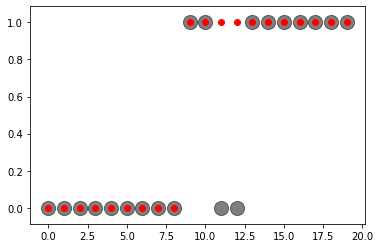

In [19]:
# Lets overlay our original scatterplot with our predicted scatterplot
plt.scatter(num_hours, passed_exam, color='black', alpha = 0.5, s = 200)
plt.scatter(num_hours, predicted_results, color = 'red')
plt.show()

Our model was able to correctly predict 18 out of 20 students. There were 2 false positives.

# Using Scikit-Learn

To take advantage of sklearn‘s abilities, we can begin by creating a LogisticRegression object.

`model = LogisticRegression()`

After creating the object, we need to fit our model on the data. When we fit the model with sklearn it will perform gradient descent, repeatedly updating the coefficients of our model in order to minimize the log-loss.

`model.fit(features, labels)`

The first parameter is a matrix of features, and the second parameter is a matrix of class labels.

Now that the model is trained, we can access a few useful attributes of the LogisticRegression object.

- `model.coef_` is a vector of the coefficients of each feature
- `model.intercept_` is the intercept `b0`

With our trained model we are able to predict whether new data points belong to the positive class using the `.predict()` method.
`.predict()` takes a matrix of features as a parameter and returns a vector of labels `1` or `0` for each sample. In making its predictions, sklearn uses a classification threshold of `0.5`.

`model.predict(features)`

If we are more interested in the predicted probability of the data samples belonging to the positive class than the actual class, we can use the `.predict_proba()` method. `predict_proba()` also takes a matrix of features as a parameter and returns a vector of probabilities, ranging from `0` to `1`, for each sample.

`model.predict_proba(features)`

#### Before proceeding, one important note is that sklearn‘s Logistic Regression implementation requires feature data to be normalized.

Normalization scales all feature data to vary over the same range. sklearn‘s Logistic Regression requires normalized feature data due to a technique called Regularization that it uses under the hood. Regularization is out of the scope of this lesson, but in order to ensure the best results from our model, we will be using a normalized version of the data.

#### SIDE LESSON ON NORMALIZATION
#### Min-Max Normalization
Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

Min-max normalization has one fairly significant downside: it does not handle outliers very well. For example, if you have 99 values between 0 and 40, and one value is 100, then the 99 values will all be transformed to a value between 0 and 0.4. 

#### Z-Score Normalization
If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number. The size of those negative and positive numbers is determined by the standard deviation of the original feature.

The only potential downside is that the features aren’t on the exact same scale. However, if outliers are present, this is the preferred method.

In [20]:
hours_studied_scaled = np.array([-1.64750894, -1.47408695, -1.30066495, -1.12724296, -0.95382097, -0.78039897, -0.60697698, -0.43355498, -0.26013299, -0.086711, 0.086711, 0.26013299, 0.43355498, 0.60697698, 0.78039897, 0.95382097, 1.12724296, 1.30066495, 1.47408695, 1.64750894])
hours_studied_scaled = hours_studied_scaled.reshape(-1,1) 
hours_studied_scaled # Z-score normalized hours studied

array([[-1.64750894],
       [-1.47408695],
       [-1.30066495],
       [-1.12724296],
       [-0.95382097],
       [-0.78039897],
       [-0.60697698],
       [-0.43355498],
       [-0.26013299],
       [-0.086711  ],
       [ 0.086711  ],
       [ 0.26013299],
       [ 0.43355498],
       [ 0.60697698],
       [ 0.78039897],
       [ 0.95382097],
       [ 1.12724296],
       [ 1.30066495],
       [ 1.47408695],
       [ 1.64750894]])

In [21]:
# Create and fit logistic regression model
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()
model.fit(hours_studied_scaled, passed_exam)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Save the model coefficients and intercept here
calculated_coefficients, intercept = model.coef_, model.intercept_
print(calculated_coefficients, intercept)

[[1.72410099]] [-0.33110604]


The next semester a group of students in the Introductory Machine Learning course want to predict their final exam scores based on how much they intended to study for the exam. The number of hours each student thinks they will study, normalized, is given in guessed_hours_scaled. Use model to predict the probability that each student will pass the final exam, and save the probabilities to passed_predictions.

In [23]:
guessed_hours_scaled = np.array([-1.30066495e+00, -1.30066495e+00, -9.53820966e-01, -7.80398973e-01, -7.80398973e-01, -7.80398973e-01, -6.06976979e-01, -2.60132991e-01, -2.60132991e-01, -8.67109970e-02, 8.67109970e-02, 8.67109970e-02, 2.60132991e-01, 6.06976979e-01, 6.06976979e-01, 9.53820966e-01, 1.47408695e+00, 1.64750894e+00, 3.31669563e+02])
guessed_hours_scaled = guessed_hours_scaled.reshape(-1,1)
guessed_hours_scaled

array([[-1.30066495e+00],
       [-1.30066495e+00],
       [-9.53820966e-01],
       [-7.80398973e-01],
       [-7.80398973e-01],
       [-7.80398973e-01],
       [-6.06976979e-01],
       [-2.60132991e-01],
       [-2.60132991e-01],
       [-8.67109970e-02],
       [ 8.67109970e-02],
       [ 8.67109970e-02],
       [ 2.60132991e-01],
       [ 6.06976979e-01],
       [ 6.06976979e-01],
       [ 9.53820966e-01],
       [ 1.47408695e+00],
       [ 1.64750894e+00],
       [ 3.31669563e+02]])

In [24]:
passed_predictions = model.predict_proba(guessed_hours_scaled)
print(passed_predictions) # Probabilities are shown for (failure,success) for each student

[[0.929142   0.070858  ]
 [0.929142   0.070858  ]
 [0.87821024 0.12178976]
 [0.84245282 0.15754718]
 [0.84245282 0.15754718]
 [0.84245282 0.15754718]
 [0.79860457 0.20139543]
 [0.68559424 0.31440576]
 [0.68559424 0.31440576]
 [0.61789062 0.38210938]
 [0.54527751 0.45472249]
 [0.54527751 0.45472249]
 [0.47068628 0.52931372]
 [0.32841036 0.67158964]
 [0.32841036 0.67158964]
 [0.21192219 0.78807781]
 [0.09882323 0.90117677]
 [0.07520421 0.92479579]
 [0.         1.        ]]


That same semester, the Data Science department decides to update the final exam passage model to consider two features instead of just one. During the final exam, students were asked to estimate how much time they spent studying, as well as how many previous math courses they have taken. The student responses, along with their exam results, were split into training and test sets. The training features, normalized, are given to you in `exam_features_scaled_train`, and the students’ results on the final are given in `passed_exam_2_train`.

Create a new Logistic Regression model named `model_2` and train it on `exam_features_scaled_train` and `passed_exam_2_train`.

In [25]:
exam_features_scaled_train = np.array([-0.26013299, -1.25537916, 0.26013299, -0.49454331, 1.64750894, -1.25537916, -1.12724296, -1.25537916, -0.43355498, 1.02712841, -0.60697698, 0.26629255, 0.60697698, 1.02712841, -0.78039897, -0.49454331, 0.086711, -1.25537916, 0.43355498, 0.26629255, 0.95382097, 0.26629255, -1.47408695, -0.49454331, -1.64750894, -1.25537916, 1.30066495, 1.02712841, -0.086711, 0.26629255])
exam_features_scaled_train = exam_features_scaled_train.reshape(-1,2)
exam_features_scaled_train # Z-score normalized exam_features_train_set

array([[-0.26013299, -1.25537916],
       [ 0.26013299, -0.49454331],
       [ 1.64750894, -1.25537916],
       [-1.12724296, -1.25537916],
       [-0.43355498,  1.02712841],
       [-0.60697698,  0.26629255],
       [ 0.60697698,  1.02712841],
       [-0.78039897, -0.49454331],
       [ 0.086711  , -1.25537916],
       [ 0.43355498,  0.26629255],
       [ 0.95382097,  0.26629255],
       [-1.47408695, -0.49454331],
       [-1.64750894, -1.25537916],
       [ 1.30066495,  1.02712841],
       [-0.086711  ,  0.26629255]])

In [26]:
passed_exam_2_train = np.array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])
passed_exam_2_train

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [27]:
model_2 = LogisticRegression()
model_2.fit(exam_features_scaled_train, passed_exam_2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Use the model you just trained to predict whether each student in the test set, `exam_features_scaled_test`, will pass the exam and save the predictions to `passed_predictions_2`. Print `passed_predictions_2`.

In [28]:
exam_features_scaled_test = np.array([ 1.12724296, -0.49454331, 0.78039897, 1.78796426, -0.95382097, 1.02712841, -1.3006649, 1.78796426, 1.47408695, -0.49454331])
exam_features_scaled_test = exam_features_scaled_test.reshape(-1, 2)
exam_features_scaled_test

array([[ 1.12724296, -0.49454331],
       [ 0.78039897,  1.78796426],
       [-0.95382097,  1.02712841],
       [-1.3006649 ,  1.78796426],
       [ 1.47408695, -0.49454331]])

In [29]:
passed_predictions_2 = model_2.predict(exam_features_scaled_test)
print(passed_predictions_2)

[1 1 1 1 1]


Compare the predictions to the actual student performance on the exam in the test set. How well did your model do?

In [30]:
passed_exam_2_test = np.array([1, 1, 0, 1, 1])
passed_exam_2_test

array([1, 1, 0, 1, 1])

#### The model_2 accuracy was .80

# Feature Importance
One of the defining features of Logistic Regression is the interpretability we have from the feature coefficients. How to handle interpreting the coefficients depends on the kind of data you are working with (normalized or not) and the specific implementation of Logistic Regression you are using. We’ll discuss how to interpret the feature coefficients from a model created in sklearn with normalized feature data.

Since our data is normalized, all features vary over the same range. Given this understanding, we can compare the feature coefficients’ magnitudes and signs to determine which features have the greatest impact on class prediction, and if that impact is positive or negative.

- Features with larger, positive coefficients will increase the probability of a data sample belonging to the positive class
- Features with larger, negative coefficients will decrease the probability of a data sample belonging to the positive class
- Features with small, positive or negative coefficients have minimal impact on the probability of a data sample belonging to the positive class

Given cancer data, a logistic regression model can let us know what features are most important for predicting survival after, for example, five years from diagnosis. Knowing these features can lead to a better understanding of outcomes, and even lives saved!

In [31]:
coefficients = model_2.coef_
coefficients = coefficients.tolist()[0]
coefficients

[1.0536012197800966, 1.3782852632090778]

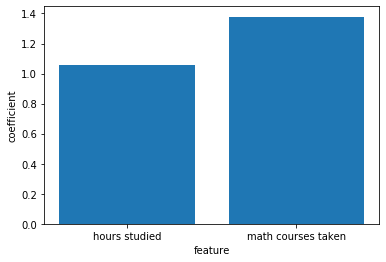

In [32]:
plt.bar([1,2],coefficients)
plt.xticks([1,2],['hours studied','math courses taken'])
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.show()

# Review
- Logistic Regression is used to perform binary classification, predicting whether a data sample belongs to a positive (present) class, labeled `1` and the negative (absent) class, labeled `0`.
- The Sigmoid Function bounds the product of feature values and their coefficients, known as the log-odds, to the range `[0,1]`, providing the probability of a sample belonging to the positive class.
- A loss function measures how well a machine learning model makes predictions. The loss function of Logistic Regression is log-loss.
- A Classification Threshold is used to determine the probabilistic cutoff for where a data sample is classified as belonging to a positive or negative class. The standard cutoff for Logistic Regression is `0.5`, but the threshold can be higher or lower depending on the nature of the data and the situation.
- Scikit-learn has a Logistic Regression implementation that allows you to fit a model to your data, find the feature coefficients, and make predictions on new data samples.
- The coefficients determined by a Logistic Regression model can be used to interpret the relative importance of each feature in predicting the class of a data sample.